# Wrangling and Analyzing WeRateDog's Twitter Archive Data

# Table of Contents
<ul>
    <li><a href='#gather'>Data Gathering</a></li>
    <li><a href='#assess'>Data Assessment</a></li>
    <li><a href='#clean'>Data Cleaning</a></li>
    <li><a href='#store'>Data Storage</a></li>
    <li><a href='#analyze'>Analysis and Visuals</a></li>
</ul>

# Background

Every data out there is **dirty** and **messy** in its own unique way and the data used in this project is not an exception. It is often said that data scientists spend about 80% of their time cleaning data and 20% to analyze and create insights from the data. And this couldn't be more true. For this project, I will be wrangling (gathering, assessing, and cleaning) archive data gotten from Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as **WeRateDogs**. This user is popularly known for rating dogs with humorous comments and a unique rating system.

Although I will perform some analysis and extract insights from the data, the focal point is the **wrangling** process.

# Wrangling and Analyzing WeRateDog's Twitter Data

## Introduction
In this project, I will be wrangling twitter archive data obtained from the Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as WeRateDogs. The interesting part of this project is the fact that it appropriately depicts how data analysts often collect data and clean it to make it ready for analysis.

## Data Wrangling
This section describes all efforts to gather, validate/assess, and finally clean the data to make it ready for analysis.
### I. Data Gathering
Here I collected the three datasets using different techniques. While two of the datasets were readily available, the other had to be queried from the Twitter API.
### II. Data Assessment
I performed both visual and programmatic assessments on the data and identified issues that needed to be addressed in order to have the correct and proper data ready for analysis.
### III. Data Cleaning
Here, I cleaned the data and appropriately rectified the data **quality** and **tidiness** issues earlier encountered during its assessment.

## Analysis and Conclusion
After cleaning the data and saving it to a new file, I decided to investigate the following questions:
1. What are the most common ratings in this data? The five most common ratings were 12, 10, 11, 13, and 9, respectively.
2. Does a dog's rating affect how Twitter users interact with the tweet in terms of the number of likes? In short, yes. Beginning from a rating of 8 out of 10, the average number of likes saw an increase up to a rating of 14 out of 10.  
3. What's the strength of the relationship between the number of retweets and its number of likes? There's a strong positive correlation of 0.93.

## Notes
In case you might be interested in replicating this project, you would need to do the following to ensure the code does not break (apart from having the necessary libraries installed):
- Create a directory named "data" which will house all the data files. Links to download the starter data files are in the wrangle_act notebook.
- Have a twitter developer account and obtain your access and customer keys.

# Packages Required
- `requests` for programmatically downloading data
- `tweepy` library to query Twitter's API
- `json` for loading tweet data which will be stored as JSON objects.
- `numpy` and `pandas` for data manipulation
- `matplotlib` and `seaborn` for data visualization
- `timeit` used only once to keep track of time elapsed querying Twitter's API

In [1]:
import requests
import tweepy

import json
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from timeit import default_timer

%matplotlib inline

<a id='gather'></a>
# Data Gathering

Three datasets are to be collected in different ways, as is often the case in the data analysis workflow. The **first** dataset has been provided by Udacity and downloaded manually. The same can be done via this link [twitter-archive-enhanced.csv](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv). The **second** dataset is an [image-predictions](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv) file in **.tsv** format, which contains predictions about what breed of dog is present in each tweet according to some neural network. This file will be downloaded programmatically using the `requests` library. The **final** dataset is to be queried from Twitter's API with `tweepy`, and using the tweet IDs from the first archive data.

#### Twitter Archive Data

In [2]:
twitter_archive = pd.read_csv('data/twitter-archive-enhanced.csv')

#### Image Predictions File

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save image_predictions file to local computer
with open('data/image_predictions.tsv', 'wb') as tsv_file:
    tsv_file.write(response.content)

In [4]:
# Load the image_predictions file with a tab delimeter
image_predictions = pd.read_csv('data/image_predictions.tsv', sep='\t')

#### Collecting the Final Dataset using Tweepy

In [5]:
# api and consumer secrets and tokens should be hidden
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

In [6]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
# Grab the tweet IDs from the first dataset
tweet_ids = twitter_archive.tweet_id.values

In [98]:
start = timer() # start timer

# Query Twitter API and write json data to tweet_json.txt
with open('data/tweet_json.txt', 'wt') as tweets_file:
    for count, tweet_id in enumerate(tweet_ids):
        print('{}: {}'.format(count + 1, tweet_id))
        
        # initiate try-except block to catch errors arising from deleted tweets, forbidden tweets and the likes
        try:
            tweet_json = api.get_status(tweet_id, tweet_mode='extended')._json
            json.dump(tweet_json, tweets_file)
            print('Success!')
            
            # Add a new line after each tweet json
            tweets_file.write('\n')
        
        # catch all errors and print the tweet IDs that caused such errors
        except tweepy.errors.TweepyException as err:
            print('Error with tweet id {}'.format(tweet_id))
    
end = timer()

1: 892420643555336193
Success!
2: 892177421306343426
Success!
3: 891815181378084864
Success!
4: 891689557279858688
Success!
5: 891327558926688256
Success!
6: 891087950875897856
Success!
7: 890971913173991426
Success!
8: 890729181411237888
Success!
9: 890609185150312448
Success!
10: 890240255349198849
Success!
11: 890006608113172480
Success!
12: 889880896479866881
Success!
13: 889665388333682689
Success!
14: 889638837579907072
Success!
15: 889531135344209921
Success!
16: 889278841981685760
Success!
17: 888917238123831296
Success!
18: 888804989199671297
Success!
19: 888554962724278272
Success!
20: 888202515573088257
Error with tweet id 888202515573088257
21: 888078434458587136
Success!
22: 887705289381826560
Success!
23: 887517139158093824
Success!
24: 887473957103951883
Success!
25: 887343217045368832
Success!
26: 887101392804085760
Success!
27: 886983233522544640
Success!
28: 886736880519319552
Success!
29: 886680336477933568
Success!
30: 886366144734445568
Success!
31: 886267009285017

Success!
243: 846153765933735936
Success!
244: 846139713627017216
Success!
245: 846042936437604353
Success!
246: 845812042753855489
Success!
247: 845677943972139009
Success!
248: 845459076796616705
Error with tweet id 845459076796616705
249: 845397057150107648
Success!
250: 845306882940190720
Success!
251: 845098359547420673
Success!
252: 844979544864018432
Success!
253: 844973813909606400
Success!
254: 844704788403113984
Error with tweet id 844704788403113984
255: 844580511645339650
Success!
256: 844223788422217728
Success!
257: 843981021012017153
Success!
258: 843856843873095681
Success!
259: 843604394117681152
Success!
260: 843235543001513987
Success!
261: 842892208864923648
Error with tweet id 842892208864923648
262: 842846295480000512
Success!
263: 842765311967449089
Success!
264: 842535590457499648
Success!
265: 842163532590374912
Success!
266: 842115215311396866
Success!
267: 841833993020538882
Success!
268: 841680585030541313
Success!
269: 841439858740625411
Success!
270: 84132

Success!
485: 814638523311648768
Success!
486: 814578408554463233
Success!
487: 814530161257443328
Success!
488: 814153002265309185
Success!
489: 813944609378369540
Success!
490: 813910438903693312
Success!
491: 813812741911748608
Success!
492: 813800681631023104
Success!
493: 813217897535406080
Success!
494: 813202720496779264
Success!
495: 813187593374461952
Success!
496: 813172488309972993
Success!
497: 813157409116065792
Success!
498: 813142292504645637
Success!
499: 813130366689148928
Success!
500: 813127251579564032
Success!
501: 813112105746448384
Success!
502: 813096984823349248
Success!
503: 813081950185472002
Success!
504: 813066809284972545
Success!
505: 813051746834595840
Success!
506: 812781120811126785
Success!
507: 812747805718642688
Error with tweet id 812747805718642688
508: 812709060537683968
Success!
509: 812503143955202048
Success!
510: 812466873996607488
Success!
511: 812372279581671427
Success!
512: 811985624773361665
Success!
513: 811744202451197953
Success!
514:

Success!
732: 781655249211752448
Success!
733: 781524693396357120
Success!
734: 781308096455073793
Success!
735: 781251288990355457
Success!
736: 781163403222056960
Success!
737: 780931614150983680
Success!
738: 780858289093574656
Success!
739: 780800785462489090
Success!
740: 780601303617732608
Success!
741: 780543529827336192
Success!
742: 780496263422808064
Success!
743: 780476555013349377
Success!
744: 780459368902959104
Success!
745: 780192070812196864
Success!
746: 780092040432480260
Success!
747: 780074436359819264
Success!
748: 779834332596887552
Success!
749: 779377524342161408
Success!
750: 779124354206535695
Success!
751: 779123168116150273
Error with tweet id 779123168116150273
752: 779056095788752897
Success!
753: 778990705243029504
Success!
754: 778774459159379968
Success!
755: 778764940568104960
Success!
756: 778748913645780993
Success!
757: 778650543019483137
Success!
758: 778624900596654080
Success!
759: 778408200802557953
Success!
760: 778396591732486144
Success!
761:

Rate limit reached. Sleeping for: 16


Success!
902: 758474966123810816
Success!
903: 758467244762497024
Success!
904: 758405701903519748
Success!
905: 758355060040593408
Success!
906: 758099635764359168
Success!
907: 758041019896193024
Success!
908: 757741869644341248
Success!
909: 757729163776290825
Success!
910: 757725642876129280
Success!
911: 757611664640446465
Success!
912: 757597904299253760
Success!
913: 757596066325864448
Success!
914: 757400162377592832
Success!
915: 757393109802180609
Success!
916: 757354760399941633
Success!
917: 756998049151549440
Success!
918: 756939218950160384
Success!
919: 756651752796094464
Success!
920: 756526248105566208
Success!
921: 756303284449767430
Success!
922: 756288534030475264
Success!
923: 756275833623502848
Success!
924: 755955933503782912
Success!
925: 755206590534418437
Success!
926: 755110668769038337
Success!
927: 754874841593970688
Success!
928: 754856583969079297
Success!
929: 754747087846248448
Success!
930: 754482103782404096
Success!
931: 754449512966619136
Success!
9

Success!
1145: 727286334147182592
Success!
1146: 727175381690781696
Success!
1147: 727155742655025152
Success!
1148: 726935089318363137
Success!
1149: 726887082820554753
Success!
1150: 726828223124897792
Success!
1151: 726224900189511680
Success!
1152: 725842289046749185
Success!
1153: 725786712245440512
Success!
1154: 725729321944506368
Success!
1155: 725458796924002305
Success!
1156: 724983749226668032
Success!
1157: 724771698126512129
Success!
1158: 724405726123311104
Success!
1159: 724049859469295616
Success!
1160: 724046343203856385
Success!
1161: 724004602748780546
Success!
1162: 723912936180330496
Success!
1163: 723688335806480385
Success!
1164: 723673163800948736
Success!
1165: 723179728551723008
Success!
1166: 722974582966214656
Success!
1167: 722613351520608256
Success!
1168: 721503162398597120
Success!
1169: 721001180231503872
Success!
1170: 720785406564900865
Success!
1171: 720775346191278080
Success!
1172: 720415127506415616
Success!
1173: 720389942216527872
Success!
1174:

Success!
1386: 700747788515020802
Success!
1387: 700518061187723268
Success!
1388: 700505138482569216
Success!
1389: 700462010979500032
Success!
1390: 700167517596164096
Success!
1391: 700151421916807169
Success!
1392: 700143752053182464
Success!
1393: 700062718104104960
Success!
1394: 700029284593901568
Success!
1395: 700002074055016451
Success!
1396: 699801817392291840
Success!
1397: 699788877217865730
Success!
1398: 699779630832685056
Success!
1399: 699775878809702401
Success!
1400: 699691744225525762
Success!
1401: 699446877801091073
Success!
1402: 699434518667751424
Success!
1403: 699423671849451520
Success!
1404: 699413908797464576
Success!
1405: 699370870310113280
Success!
1406: 699323444782047232
Success!
1407: 699088579889332224
Success!
1408: 699079609774645248
Success!
1409: 699072405256409088
Success!
1410: 699060279947165696
Success!
1411: 699036661657767936
Success!
1412: 698989035503689728
Success!
1413: 698953797952008193
Success!
1414: 698907974262222848
Success!
1415:

Success!
1627: 684800227459624960
Success!
1628: 684594889858887680
Success!
1629: 684588130326986752
Success!
1630: 684567543613382656
Success!
1631: 684538444857667585
Success!
1632: 684481074559381504
Success!
1633: 684460069371654144
Success!
1634: 684241637099323392
Success!
1635: 684225744407494656
Success!
1636: 684222868335505415
Success!
1637: 684200372118904832
Success!
1638: 684195085588783105
Success!
1639: 684188786104872960
Success!
1640: 684177701129875456
Success!
1641: 684147889187209216
Success!
1642: 684122891630342144
Success!
1643: 684097758874210310
Success!
1644: 683857920510050305
Success!
1645: 683852578183077888
Success!
1646: 683849932751646720
Success!
1647: 683834909291606017
Success!
1648: 683828599284170753
Success!
1649: 683773439333797890
Success!
1650: 683742671509258241
Success!
1651: 683515932363329536
Success!
1652: 683498322573824003
Success!
1653: 683481228088049664
Success!
1654: 683462770029932544
Success!
1655: 683449695444799489
Success!
1656:

Success!
1868: 675334060156301312
Success!
1869: 675166823650848770
Success!
1870: 675153376133427200
Success!
1871: 675149409102012420
Success!
1872: 675147105808306176
Success!
1873: 675146535592706048
Success!
1874: 675145476954566656
Success!
1875: 675135153782571009
Success!
1876: 675113801096802304
Success!
1877: 675111688094527488
Success!
1878: 675109292475830276
Success!
1879: 675047298674663426
Success!
1880: 675015141583413248
Success!
1881: 675006312288268288
Success!
1882: 675003128568291329
Success!
1883: 674999807681908736
Success!
1884: 674805413498527744
Success!
1885: 674800520222154752
Success!
1886: 674793399141146624
Success!
1887: 674790488185167872
Success!
1888: 674788554665512960
Success!
1889: 674781762103414784
Success!
1890: 674774481756377088
Success!
1891: 674767892831932416
Success!
1892: 674764817387900928
Success!
1893: 674754018082705410
Success!
1894: 674752233200820224
Success!
1895: 674743008475090944
Success!
1896: 674742531037511680
Success!
1897:

Success!
2109: 670452855871037440
Success!
2110: 670449342516494336
Success!
2111: 670444955656130560
Success!
2112: 670442337873600512
Success!
2113: 670435821946826752
Success!
2114: 670434127938719744
Success!
2115: 670433248821026816
Success!
2116: 670428280563085312
Success!
2117: 670427002554466305
Success!
2118: 670421925039075328
Success!
2119: 670420569653809152
Success!
2120: 670417414769758208
Success!
2121: 670411370698022913
Success!
2122: 670408998013820928
Success!
2123: 670403879788544000
Success!
2124: 670385711116361728
Success!
2125: 670374371102445568
Success!
2126: 670361874861563904
Success!
2127: 670338931251150849
Success!
2128: 670319130621435904
Success!
2129: 670303360680108032
Success!
2130: 670290420111441920
Success!
2131: 670093938074779648
Success!
2132: 670086499208155136
Success!
2133: 670079681849372674
Success!
2134: 670073503555706880
Success!
2135: 670069087419133954
Success!
2136: 670061506722140161
Success!
2137: 670055038660800512
Success!
2138:

Success!
2350: 666051853826850816
Success!
2351: 666050758794694657
Success!
2352: 666049248165822465
Success!
2353: 666044226329800704
Success!
2354: 666033412701032449
Success!
2355: 666029285002620928
Success!
2356: 666020888022790149
Success!


In [99]:
# Print how long it took to download all tweet data
print('Took {} minutes to load all tweets'.format((end - start)/60))

Took 39.84684555503333 minutes to load all tweets


In [8]:
# Initialize dictionary with empty lists
# The data will be loaded as a dictionary whose values are lists
tweets_dict = dict(tweet_id=[], retweet_count=[], favorite_count=[])

# Load the tweet-json data gotten via the Twitter API
with open('data/tweet_json.txt') as tweets:
    loaded_data = [json.loads(tweet) for tweet in tweets]
    
# Append the the data to their corresponding lists
for json_object in loaded_data:
    tweets_dict['tweet_id'].append(json_object['id'])
    tweets_dict['retweet_count'].append(json_object['retweet_count'])
    tweets_dict['favorite_count'].append(json_object['favorite_count'])

In [9]:
# Load the dictionary into a data frame
new_twitter_archive = pd.DataFrame(tweets_dict)

<a id='assess'></a>
# Data Assessment

In this section the datasets will be assessed for quality and tidiness, both visually and programmatically. Before proceeding though, it would help to provide a short description of some of the column names in `twitter_archive` and `new_twitter_archive`. For more information, refer to this [data-dictionary](https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet).

#### Key Variables in the Tweet Data
- **tweet_id**: The integer representation of the unique identifier for the Tweet.
- **in_reply_to_status_id** : Contains the Tweet ID of the original Tweet if the represented Tweet is a reply to that tweet else Null
- **in_reply_to_user_id** : Contains the user ID of the author of the original Tweet if the represented Tweet is a reply else Null
- **timestamp** : Date and time at which the represented Tweet was made
- **source**: The device or platform on which the Tweet was made.
- **text**: The content of the Tweet
- **retweeted_status_id**: ID of the original Tweet if the represented Tweet is a retweet
- **retweeted_status_user_id**: ID of the original Tweet author if the represented Tweet is a retweet.
- **retweeted_status_timestamp**: Time at which original Tweet was made if the represented Tweet is a retweet
- **expanded_urls**: Link(s) to the represented Tweet
- **rating_numerator**: The score of a dog
- **rating_denominator**: WeRateDogs' rating system
- **name**: name of the dog being rated in the Tweet
- **doggo**: a big pupper
- **floofer**: any dog with seemingly excess fur
- **pupper**: a small doggo, usually younger
- **puppo**: a transitional phase between pupper and doggo
- **retweet_count**: number of times the represented Tweet was retweeted
- **favorite_count**: number of likes of the represented Tweet.

#### Key Variables in the Image predictions file
- **img_num** - number specifying the image that was passed to the algorithm to make predictions. 1 means the first image, 3 means the third image and so on.
- **p1, p2, p3** - algorithm's first, second, and third predictions respectively
- **p1_conf, p2_conf, p3_conf** - the algorithm's confidence in predictions p1, p2, and p3 respectively
- **p1_dog, p2_dog, p3_dog** - a boolean specifying whether or not the prediction is that of a dog
- **jpg_url** - link to the image used to make a prediction

In [10]:
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
# The shapes are not equal as some tweets have been deleted
print('Shape of the original twitter data {}'.format(twitter_archive.shape))
print('Shape of newly collected archive data: {}'.format(new_twitter_archive.shape))

Shape of the original twitter data (2356, 17)
Shape of newly collected archive data: (2327, 3)


In [13]:
new_twitter_archive.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7018,33839
1,892177421306343426,5303,29353
2,891815181378084864,3486,22067
3,891689557279858688,7232,36971
4,891327558926688256,7771,35345


In [14]:
# It's strange that some tweets have 0 favorite count
new_twitter_archive[['retweet_count', 'favorite_count']].describe()

,retweet_count,favorite_count
count,2327.000000,2327.000000
mean,2473.616244,7060.047701
std,4189.320284,10971.040362
min,1.000000,0.000000
25%,495.000000,1225.000000
50%,1149.000000,3053.000000
75%,2864.500000,8611.500000
max,70825.000000,145008.000000


In [15]:
new_twitter_archive.query('favorite_count == 0').head()

,tweet_id,retweet_count,favorite_count
31,886054160059072513,93,0
35,885311592912609280,15450,0
67,879130579576475649,5748,0
72,878404777348136964,1078,0
73,878316110768087041,5532,0


In [16]:
(new_twitter_archive['favorite_count'] == 0).sum()

160

In [17]:
twitter_archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [18]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
# No null values in this dataset
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Tidiness

- The columns "doggo", "floofer", "pupper", and "puppo" in **twitter_archive** can all be collapsed into one column.

- **twitter_archive** and **new_twitter_archive** should not be two separate datasets.

### Quality

While it has been observed that **twitter_archive** contains many missing values, not all of them need to be cleaned. For instance, if a tweet is not a retweet, the "retweeted_status_id" will be missing. Likewise, if the tweet is not a reply, the "in_reply_to_status_id" will be missing. Interestingly, these columns are irrelevant since they mostly contain null values and will be eventually dropped. There are, however, some data missingess that must be rectified. Below, are some data quality issues:

1. Some of the represented tweets are not original tweets made by @dog_rates but retweets. 
2. Presence of zeros in **new_twitter_archive** for "favorite_count"
3. "source" contains irrelevant HTML tags and attributes. The relevant information is within the tags.
4. "timestamp" is a string and not a datetime object.
5. "expanded_urls" contains multiple links to the same Tweet. Only one is needed.
6. Missing data in the "expanded_urls" column
7. Following the correction of the two previous issues, the "expanded_urls" should be renamed.
8. Multiple dog stages/categories for one dog which must be separated with a comma
9. "in_reply_to_status_id" and "in_reply_to_user_id" are irrelevant and contain mostly null values.
10. Some dog names in **twitter_archive** are incorrect. Missing dog names should be properly encoded as such. 

<a id='clean'></a>
# Data Cleaning

Having identified some data quality and tidiness issues, I  now proceed to implement the required changes in the data. Following best practice, new copies of the dataframes will be created which will help verify that the desired changes have been implemented correctly. 
For ease of flow, I will first address the tidiness issues.

In [22]:
# Make copy of original dataset to work with
twitter_archive_clean = twitter_archive.copy()

## Addressing Data Tidiness

<a id='issue_1_tidy'></a>
### Issue 1
The dog stage/category is represented across 4 columns (doggo, floofer, pupper, puppo) instead of just one.

In [23]:
twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].sample(5)

,doggo,floofer,pupper,puppo
1371,None,None,None,None
84,None,None,None,None
1207,None,None,None,None
1028,None,None,None,None
1898,None,None,None,None


##### Define
Replace all "None" values in these columns by an empty string in order to concatenate them. For tweets that contain an empty string afterwards, replace the empty strings with a NULL value.

##### Code

In [24]:
twitter_archive_clean['dog_category'] = (twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']]
                         .replace('None', '')
                         .apply(lambda x: x['doggo'] + x['floofer'] + x['pupper'] + x['puppo'], axis=1)
                        ).replace('', np.nan)

twitter_archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

##### Test

In [25]:
twitter_archive_clean['dog_category'].value_counts()

pupper          245
doggo            83
puppo            29
doggopupper      12
floofer           9
doggopuppo        1
doggofloofer      1
Name: dog_category, dtype: int64

<strong>Note:</strong> Some dogs fall into multiple categories. This is a data quality issue that will be dealt with in <a href='#issue_8'>Issue 8</a> while <a href='#data_quality'>addressing data quality</a>.

### Issue 2
The "favorite_count" and "retweet_count" columns should also be in **twitter_archive** since they are both information obtained from the archive data.

In [26]:
new_twitter_archive[['favorite_count', 'retweet_count']].head()

,favorite_count,retweet_count
0,33839,7018
1,29353,5303
2,22067,3486
3,36971,7232
4,35345,7771


##### Define
Merge dataframes **twitter_archive_clean** and **new_twitter_archive** based on tweet IDs that are common to both dataframes. Some tweets have already been deleted between the period during which both datasets were collected. Therefore, not all tweet IDs in **twitter_archive_clean** will be present in **new_twitter_archive**.

##### Code

In [27]:
twitter_archive_clean = pd.merge(twitter_archive_clean, new_twitter_archive, on='tweet_id', how='inner')

In [28]:
pd.merge(twitter_archive_clean, image_predictions, on='tweet_id', how='inner').shape

(2057, 27)

##### Test

In [29]:
# Assert that "favorite_count" is now in the twitter_archive_clean
assert 'favorite_count' in twitter_archive_clean.columns
# Assert that some rows have been dropped
assert len(twitter_archive_clean) < len(twitter_archive)

<a id='data_quality'></a>
## Addressing Data Quality

In [30]:
twitter_archive_clean[~twitter_archive_clean['retweeted_status_id'].isnull() ].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_category,retweet_count,favorite_count
31,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,NaN,93,0
35,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,NaN,15450,0
67,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,NaN,5748,0
72,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,NaN,1078,0
73,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,NaN,5532,0


### Issues 1 & 2
Some of the tweets are not original ratings but retweets made by @WeRateDogs. This [tweet](https://twitter.com/dog_rates/status/885311592912609280) with ID 885311592912609280 is an example.

From research made, it was also found that every retweet has a Tweet ID attributed to the user who made a retweet. This ID is different from the ID of the original tweet. For instance, [https://twitter.com/dog_rates/status/885311592912609280](https://twitter.com/dog_rates/status/885311592912609280) points to the retweet of the original tweet which is [https://twitter.com/dog_rates/status/830583320585068544](https://twitter.com/dog_rates/status/830583320585068544). The retweet cannot be liked because it doesn't exist on its own but points to the original tweet. While the original tweet has 62,518 likes, the retweet has 0 likes (though this is not seen on Twitter). My assumption is that all tweets with zero favorite_count are retweets which will be confirmed below. Thus, issues 1 and 2 are tackled here.

In [31]:
retweets = twitter_archive_clean[~twitter_archive_clean['retweeted_status_id'].isnull() ]

In [32]:
assert len(retweets) == (twitter_archive_clean['favorite_count'] == 0).sum()

##### Define
Identify all retweets and drop them.

##### Code

In [33]:
twitter_archive_clean = twitter_archive_clean[ twitter_archive_clean['retweeted_status_id'].isnull() ]

##### Test

In [34]:
twitter_archive_clean.shape

(2167, 16)

In [35]:
# The retweet columns can now be dropped since the data does not contain retweets
twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],
               axis='columns',
               inplace=True)

### Issue 3
The "source" column contains HTML tags which are irrelevant. The information we need is in the tags.

In [36]:
twitter_archive_clean.loc[0, 'source']

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

##### Define
Use the series method `str.extract` to extract the source from within the HTML tags.

##### Code

In [37]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.extract('>(.+)<')

##### Test

In [38]:
twitter_archive_clean['source'].value_counts()

Twitter for iPhone     2035
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                10
Name: source, dtype: int64

### Issue 4
**timestamp** is a string and not a datetime object.

##### Define
Convert **timestamp** to datetime using `pd.to_datetime` function.

##### Code

In [39]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

##### Test

In [40]:
twitter_archive_clean['timestamp'].head()

0   2017-08-01 16:23:56+00:00
1   2017-08-01 00:17:27+00:00
2   2017-07-31 00:18:03+00:00
3   2017-07-30 15:58:51+00:00
4   2017-07-29 16:00:24+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

### Issue 5
Some tweets have more than one url link in the **expanded_urls** column. These cases occur when there's more than one photo shared alongside the tweet. Since the photos are together with the tweet, only one link is required.

##### Define
Split "expanded_urls" on the comma delimeter and retrieve the first element from the split.

##### Code

In [41]:
twitter_archive_clean['expanded_urls'] = twitter_archive_clean['expanded_urls'].str.split(',', expand=True)[0]

#### Test

In [42]:
twitter_archive_clean.loc[0, 'expanded_urls']

'https://twitter.com/dog_rates/status/892420643555336193/photo/1'

### Issue 6
Some tweet urls are missing.

In [43]:
twitter_archive_clean['expanded_urls'].isnull().sum()

58

##### Define
Concatenate the tweet IDs with the link to WeRateDogs' status.

##### Code

In [44]:
first_part = 'https://twitter.com/dog_rates/status/'

In [45]:
# Concatenate the first url with the tweet IDs
twitter_archive_clean['expanded_urls'] = np.where(twitter_archive_clean['expanded_urls'].isnull(),
                            first_part + twitter_archive_clean['tweet_id'].astype(str),
                            twitter_archive_clean['expanded_urls'])

##### Test

In [46]:
assert twitter_archive_clean['expanded_urls'].isnull().sum() == 0

### Issue 7
"expanded_urls" is a non descriptive column name since each tweet now has just one url.

##### Define
Rename "expanded_urls" to "tweet_url"

##### Code

In [47]:
twitter_archive_clean.rename(columns={'expanded_urls': 'tweet_url'}, inplace=True)

##### Test

In [48]:
assert 'tweet_url' in twitter_archive_clean.columns

<a id='issue_8'></a>
### Issue 8
Multiple categories also exist as identified while tidying the data in <a href='#issue_1_tidy'>Issue 1</a>

In [49]:
twitter_archive_clean['dog_category'].value_counts()

pupper          224
doggo            74
puppo            24
doggopupper      10
floofer           9
doggopuppo        1
doggofloofer      1
Name: dog_category, dtype: int64

##### Define
Separate multiple categories with a comma

##### Code

In [50]:
# Replace pupper with puppo
twitter_archive_clean['dog_category'] = twitter_archive_clean['dog_category'].str.replace('pupper', 'puppo')

In [51]:
# Separate multiple categories with a comma
twitter_archive_clean['dog_category'] = np.where(twitter_archive_clean['dog_category']=='doggofloofer', 'doggo,floofer', twitter_archive_clean['dog_category'])
twitter_archive_clean['dog_category'] = np.where(twitter_archive_clean['dog_category']=='doggopuppo', 'doggo,puppo', twitter_archive_clean['dog_category'])

##### Test

In [52]:
twitter_archive_clean['dog_category'].value_counts()

puppo            248
doggo             74
doggo,puppo       11
floofer            9
doggo,floofer      1
Name: dog_category, dtype: int64

### Issue 9
"in_reply_to_status_id" and "in_reply_to_user_id" are mostly null values.

In [53]:
twitter_archive_clean[['in_reply_to_status_id', 'in_reply_to_user_id']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167 entries, 0 to 2326
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   in_reply_to_status_id  78 non-null     float64
 1   in_reply_to_user_id    78 non-null     float64
dtypes: float64(2)
memory usage: 115.3 KB


##### Define
Drop the two columns.

##### Code

In [54]:
twitter_archive_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id'], inplace=True)

##### Test

In [55]:
assert 'in_reply_to_status_id' not in twitter_archive_clean.columns
assert 'in_reply_to_user_id' not in twitter_archive_clean.columns

### Issue 10
Some dog names are incorrect. Some are also missing.

##### Define
Identify incorrect and missing names and replace them with a null value.

##### Code

In [56]:
twitter_archive_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Ho

In [57]:
incorrect_and_missing_names = ['a', 'the', 'None', 'quite', 'incredibly', 'very', 'O', 'his', 'just',
                               'mad', 'all', 'old','infuriating', 'by','life', 'space', ]

twitter_archive_clean['name'] = twitter_archive_clean['name'].replace(incorrect_and_missing_names, np.nan)

##### Test

In [58]:
assert twitter_archive_clean['name'].isin(incorrect_and_missing_names).sum() == 0

### Other Issues/limitations

- Some tweets have a rating denominator less than 10; others even have values greater than 10. An example of such is this [tweet](https://twitter.com/dog_rates/status/731156023742988288) with **17** "doggos" in the picture, a rating_denominator of 170 and a rating_numerator of 204 (204/17 = 12 therefore each dog was rated 12/10). Few more tweets like this occur. In some other cases, the rating_denominator is 10 but the rating_numerator is exceptionally high as in [this tweet](https://twitter.com/dog_rates/status/749981277374128128) with the american flag behind the dog.   I think these issues are better left and filtered out as might be needed during analysis, rather than cleaning them.

- I replaced every incorrect dog name with null values as trying to fix this with correct names might become overly complicated.

<a id='store'></a>
# Data Storage

The cleaned data will now be merged with the image_predictions file and stored as a csv file.

In [59]:
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions, how='inner', on='tweet_id')

In [60]:
twitter_archive_clean.to_csv('data/twitter_archive_master.csv', index=None)

<a id='analyze'></a>
# Analysis and Visuals

I hope to investigate three questions in this section, including:
1. What are the most common ratings in this data?
2. Does a dog's rating affect how Twitter users interact with the tweet in terms of the number of likes?
3. What's the strength of the relationship between the number of retweets and its number of likes?

This is where I will replace some dog ratings with their averages. I will first get the number of dogs that were rated in the tweet and divide the total rating by that number. For other ratings that may skew the data, I will filter them out.

In [61]:
import os

# Create sub-directory if it doesn't yet exist
if not os.path.exists('visuals'):
    os.mkdir('visuals')

In [62]:
from matplotlib import rcParams

# Set default figure size for plots, width 8, height 5
rcParams['figure.figsize'] = (8.0, 5.0)

In [63]:
# Subset ratings, favorite_count, and retweet_count columns from twitter_archive_clean
ratings = twitter_archive_clean.loc[:, ['rating_numerator', 'rating_denominator', 'favorite_count', 'retweet_count']]

In [64]:
# Get number of dogs based on the condition that the denominator is a multiple of 10 and greater than 10
get_num_dogs = lambda rating_denom: rating_denom//10 if (rating_denom % 10 == 0) & (rating_denom != 10) else 1
num_of_dogs = ratings['rating_denominator'].apply(get_num_dogs).values

In [65]:
# Recalculate the dogs' ratings
ratings['rating_numerator'] = (ratings['rating_numerator'] / num_of_dogs).astype(np.int64)

# Replace the denominators based on the specified condition
ratings['rating_denominator'] = np.where((ratings['rating_denominator'] % 10 ==0) & (ratings['rating_denominator'] != 10),
                                         10, ratings['rating_denominator']
                                        )

In [66]:
# Get denominators that are not equal to 10
ratings['rating_denominator'].value_counts()

10    1982
11       2
7        1
2        1
Name: rating_denominator, dtype: int64

In [67]:
# Get the numerators that occur only once or twice
ratings['rating_numerator'].value_counts()

12      452
10      419
11      402
13      257
9       152
8        95
7        52
14       35
5        33
6        32
3        19
4        15
2        10
1         5
0         2
26        1
27        1
1776      1
75        1
24        1
420       1
Name: rating_numerator, dtype: int64

In [68]:
# Filter out denominators that are not equal to 10
ratings = ratings[~ratings['rating_denominator'].isin([11, 7, 2]) ]

# Filter out rare numerators
ratings = ratings[ ~ratings['rating_numerator'].isin([0, 1, 24, 26, 27, 75, 420, 1776]) ]

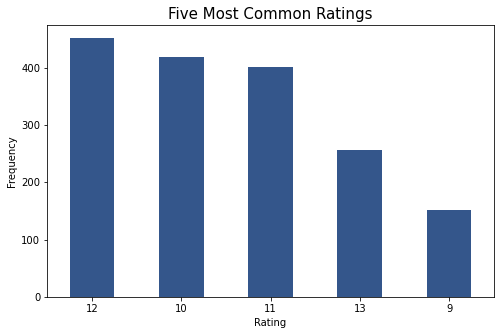

In [69]:
# Create a bar chart of the five most common ratings
ratings['rating_numerator'].value_counts().head().plot(kind='bar',
                                                       rot=False,
                                                       color = '#34568B',
                                                       xlabel='Rating',
                                                       ylabel='Frequency')
plt.title('Five Most Common Ratings', fontsize=15);
plt.savefig('visuals/five_most_ratings.jpg', dpi=100, bbox_inches='tight')

In [70]:
# Compute the average number of likes for each rating given
favorites_by_rating = ratings.groupby(by='rating_numerator')['favorite_count'].mean().sort_index()
color = ['#34568B' if i in range(10, 15) else 'gray' for i in favorites_by_rating.index]

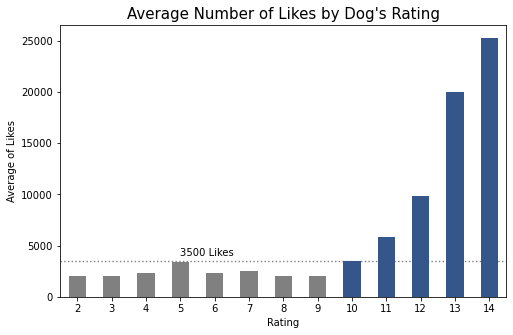

In [71]:
# Create plot
favorites_by_rating.plot(kind='bar',
                         rot=False,
                         color = color,
                         xlabel='Rating',
                         ylabel='Average of Likes',
                         zorder=2)
plt.title('Average Number of Likes by Dog\'s Rating', fontsize=15)

# Create horizontal line. Set zorder to 1 to place it behind the bars
plt.axhline(3500,
            color='gray',
            zorder=1,
            linewidth=1.4, linestyle='dotted')

plt.text(3, 4000, '3500 Likes')

plt.savefig('visuals/favorites_by_rating.jpg', dpi=100, bbox_inches='tight')

In [72]:
# Compute the correlation between retweet_count and favorite_count
corr = round(twitter_archive_clean['retweet_count'].corr(twitter_archive_clean['favorite_count']), 2)
print(corr)

0.93


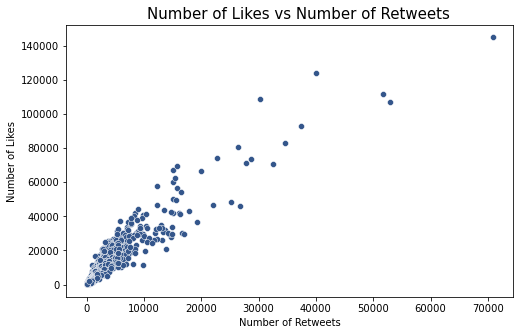

In [73]:
# Make a scatterplot of the favorite count against retweet_count
sns.scatterplot(data=twitter_archive_clean, x='retweet_count', y='favorite_count', color='#34568B')
plt.xlabel('Number of Retweets')
plt.ylabel('Number of Likes')
plt.title('Number of Likes vs Number of Retweets', fontsize=15, x=0.52);

plt.savefig('visuals/scatter_retweets_likes.jpg', dpi=100, bbox_inches='tight')

### Insights

1. The 5 most common ratings of dogs are 12, 10, 11, 13, and 9, in that order.

2. A higher rating seems to attract more likes. While the average number of likes increases continually with ratings above 10 and up to 14, ratings below 10 struggle to get past 3500 likes on average.

3. There is high positive correlation (0.93) between the number of retweets and the number of likes. Essentially, the more retweets a tweet gets, the more popular it becomes, which makes it possible to earn more likes. 

### Helpful Resources

Occasionally, I ran into a wall and had to look up a few things. These web pages helped me greatly:

- [Handling Tweepy Exceptions](https://docs.tweepy.org/en/stable/exceptions.html)

- [Loading JSON data](https://researchdatapod.com/how-to-solve-python-jsondecodeerror-extra-data/)